# Import Sample Dataset from Kaggle

In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import os
import pandas as pd
from IPython.display import display

# Load the dataset into a pandas DataFrame
# Replace "YOUR_FILE_PATH_HERE.csv" with the actual path to the data file within the downloaded dataset
file_path = "fruitvegprices-2017_2022.csv" # Replace with the actual file name

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "datota/fruit-and-vegatable-prices-in-uk-2017-2022",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-988952777.py:13: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 452k/452k [00:00<00:00, 1.91MB/s]

First 5 records:   category    item            variety        date  price unit
0    fruit  apples  bramleys_seedling  2022-03-11   2.05   kg
1    fruit  apples  coxs_orange_group  2022-03-11   1.22   kg
2    fruit  apples    egremont_russet  2022-03-11   1.14   kg
3    fruit  apples           braeburn  2022-03-11   1.05   kg
4    fruit  apples               gala  2022-03-11   1.03   kg


# Basic Check of the Data

In [2]:
# Get information about the DataFrame, including column data types and non-null values
print("\nDataFrame Info:")
df.info()

# Generate descriptive statistics of the numerical columns
print("\nDescriptive Statistics:")
display(df.describe())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9647 entries, 0 to 9646
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  9647 non-null   object 
 1   item      9647 non-null   object 
 2   variety   9647 non-null   object 
 3   date      9647 non-null   object 
 4   price     9647 non-null   float64
 5   unit      9647 non-null   object 
dtypes: float64(1), object(5)
memory usage: 452.3+ KB

Descriptive Statistics:


,price
count,9647.000000
mean,1.528333
std,1.927865
min,0.020000
25%,0.540000
50%,0.880000
75%,1.500000
max,17.600000


# Group each unique item with each year average year's price

In [3]:
# Convert 'date' column to datetime objects if it's not already
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column
df['year'] = df['date'].dt.year

# Group by 'item' and 'year' and calculate the mean price
average_price_by_item_year = df.groupby(['item', 'year'])['price'].mean().reset_index()

# Display the result
print("Average price per item per year:")
display(average_price_by_item_year)

Average price per item per year:


,item,year,price
0,alstromeria,2017,0.275000
1,alstromeria,2018,0.282200
2,apples,2017,0.765490
3,apples,2018,0.884112
4,apples,2019,0.906705
...,...,...,...
239,turnip,2021,1.438400
240,turnip,2022,1.319000
241,watercress,2017,10.506250
242,watercress,2018,9.516400


# Fill the empty prices of each item with the previous year's value

In [5]:
#  Extract unique items and create a list of all years from 2017 to 2022.

unique_items = average_price_by_item_year['item'].unique().tolist()
all_years = list(range(2017, 2023))


# Iterate through each unique item and create a DataFrame with all years from 2017 to 2022 for that item, then append it to a list.
filled_price_data = []
for item in unique_items:
    item_all_years = pd.DataFrame({'year': all_years, 'item': item})
    filled_price_data.append(item_all_years)


# Iterate through each item, merge the DataFrame with all years with the item's price data, sort by year, and fill missing values using forward-fill.
filled_price_data = []
for item in unique_items:
    item_all_years = pd.DataFrame({'year': all_years, 'item': item})
    item_data = average_price_by_item_year[average_price_by_item_year['item'] == item]
    merged_data = pd.merge(item_all_years, item_data, on=['item', 'year'], how='left')
    merged_data = merged_data.sort_values(by='year')
    merged_data['price'] = merged_data['price'].fillna(method='ffill')
    filled_price_data.append(merged_data)

combined_price_data = pd.concat(filled_price_data, ignore_index=True)
display(combined_price_data)



/tmp/ipython-input-2308757335.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data['price'] = merged_data['price'].fillna(method='ffill')
/tmp/ipython-input-2308757335.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data['price'] = merged_data['price'].fillna(method='ffill')
/tmp/ipython-input-2308757335.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data['price'] = merged_data['price'].fillna(method='ffill')
/tmp/ipython-input-2308757335.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data['price'] = merged_data['price'].fillna(method='ffill')
/tmp/ipython-input-2308757335.py:21: FutureW

,year,item,price
0,2017,alstromeria,0.275000
1,2018,alstromeria,0.282200
2,2019,alstromeria,0.282200
3,2020,alstromeria,0.282200
4,2021,alstromeria,0.282200
...,...,...,...
319,2018,watercress,9.516400
320,2019,watercress,8.899118
321,2020,watercress,8.899118
322,2021,watercress,8.899118


# Combine the data for all items into a single DataFrame

In [6]:
# Concatenate all the individual DataFrames stored in the filled_price_data list into a single DataFrame, reset the index, and display the head of the combined DataFrame.

combined_price_data = pd.concat(filled_price_data, ignore_index=True)
combined_price_data = combined_price_data.reset_index(drop=True)
display(combined_price_data.head())

,year,item,price
0,2017,alstromeria,0.2750
1,2018,alstromeria,0.2822
2,2019,alstromeria,0.2822
3,2020,alstromeria,0.2822
4,2021,alstromeria,0.2822


# Prepare the data for modeling

In [7]:
X = combined_price_data[['year']]
X = pd.concat([X, pd.get_dummies(combined_price_data['item'], prefix='item')], axis=1)
y = combined_price_data['price']

# Split the data into training and testing sets

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Predict prices for 2023 using the trained linear regression model.

In [11]:
X_2023 = pd.DataFrame({'year': [2023] * len(unique_items)})
X_2023['item'] = unique_items

# Create one-hot encoded columns for items in X_2023
X_2023_encoded = pd.get_dummies(X_2023['item'], prefix='item')
X_2023 = X_2023[['year']]
X_2023 = pd.concat([X_2023, X_2023_encoded], axis=1)

# Ensure all item columns from the training data are present in X_2023
missing_cols = set(X_train.columns) - set(X_2023.columns)
for c in missing_cols:
    X_2023[c] = 0
X_2023 = X_2023[X_train.columns] # Ensure the order of columns is the same as X_train

# Predict prices for 2023
predicted_prices_2023_values = model.predict(X_2023)

# Create a DataFrame for predicted prices
predicted_prices_2023 = pd.DataFrame({
    'item': unique_items,
    'predicted_price': predicted_prices_2023_values
})

display(predicted_prices_2023.head())

,item,predicted_price
0,alstromeria,0.901649
1,apples,1.491973
2,asparagus,7.945690
3,beans,2.894133
4,beetroot,0.967114


# Evaluate the model

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict the prices on the test set (X_test)
y_pred = model.predict(X_test)

# Handle NaN values in y_test for evaluation
# For evaluation purposes, we can remove the corresponding predictions where y_test is NaN
non_nan_indices = ~y_test.isna()
y_test_cleaned = y_test[non_nan_indices]
y_pred_cleaned = y_pred[non_nan_indices]


# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test_cleaned, y_pred_cleaned)

# Calculate the R-squared score
r2 = r2_score(y_test_cleaned, y_pred_cleaned)

# Print the calculated MSE and R-squared scores
print(f"Mean Squared Error (MSE) on the test set: {mse}")
print(f"R-squared (R2) score on the test set: {r2}")

Mean Squared Error (MSE) on the test set: 0.3551586907993085
R-squared (R2) score on the test set: 0.9322565290130121


# Combine historical and predicted prices with years as columns

In [18]:
# Pivot the combined_price_data to have years as columns
historical_pivot = combined_price_data.pivot(index='item', columns='year', values='price')

# Rename the predicted price column for clarity before merging
predicted_prices_2023_renamed = predicted_prices_2023.rename(columns={'predicted_price': 'Predicted Price in 2023'})

# Merge the historical pivot table with the predicted prices for 2023
final_combined_data = pd.merge(historical_pivot, predicted_prices_2023_renamed, left_index=True, right_on='item', how='left')

# Set 'item' as the index after merging
final_combined_data = final_combined_data.set_index('item')

# Display the final combined DataFrame
display(final_combined_data)

,2017,2018,2019,2020,2021,2022,Predicted Price in 2023
item,,,,,,,
alstromeria,0.275000,0.282200,0.282200,0.282200,0.282200,0.282200,0.901649
apples,0.765490,0.884112,0.906705,1.156789,1.106423,1.288983,1.491973
asparagus,NaN,7.827692,8.137059,8.324375,10.480588,10.480588,7.945690
beans,NaN,2.052105,2.007857,2.612712,2.720517,2.720517,2.894133
beetroot,0.483750,0.477400,0.495000,0.474400,0.532600,0.511000,0.967114
blackberries,NaN,6.710000,6.292500,7.261111,7.867500,7.867500,6.710012
blueberries,NaN,7.388125,7.009474,8.465000,8.858889,8.858889,7.638577
brussels_sprouts,0.681250,0.772500,0.808125,0.921333,0.980968,0.825000,1.289129
cabbage,0.408500,0.445000,0.577576,0.535983,0.548809,0.489500,1.012512


# Plot the historical and predicted prices over time for each item

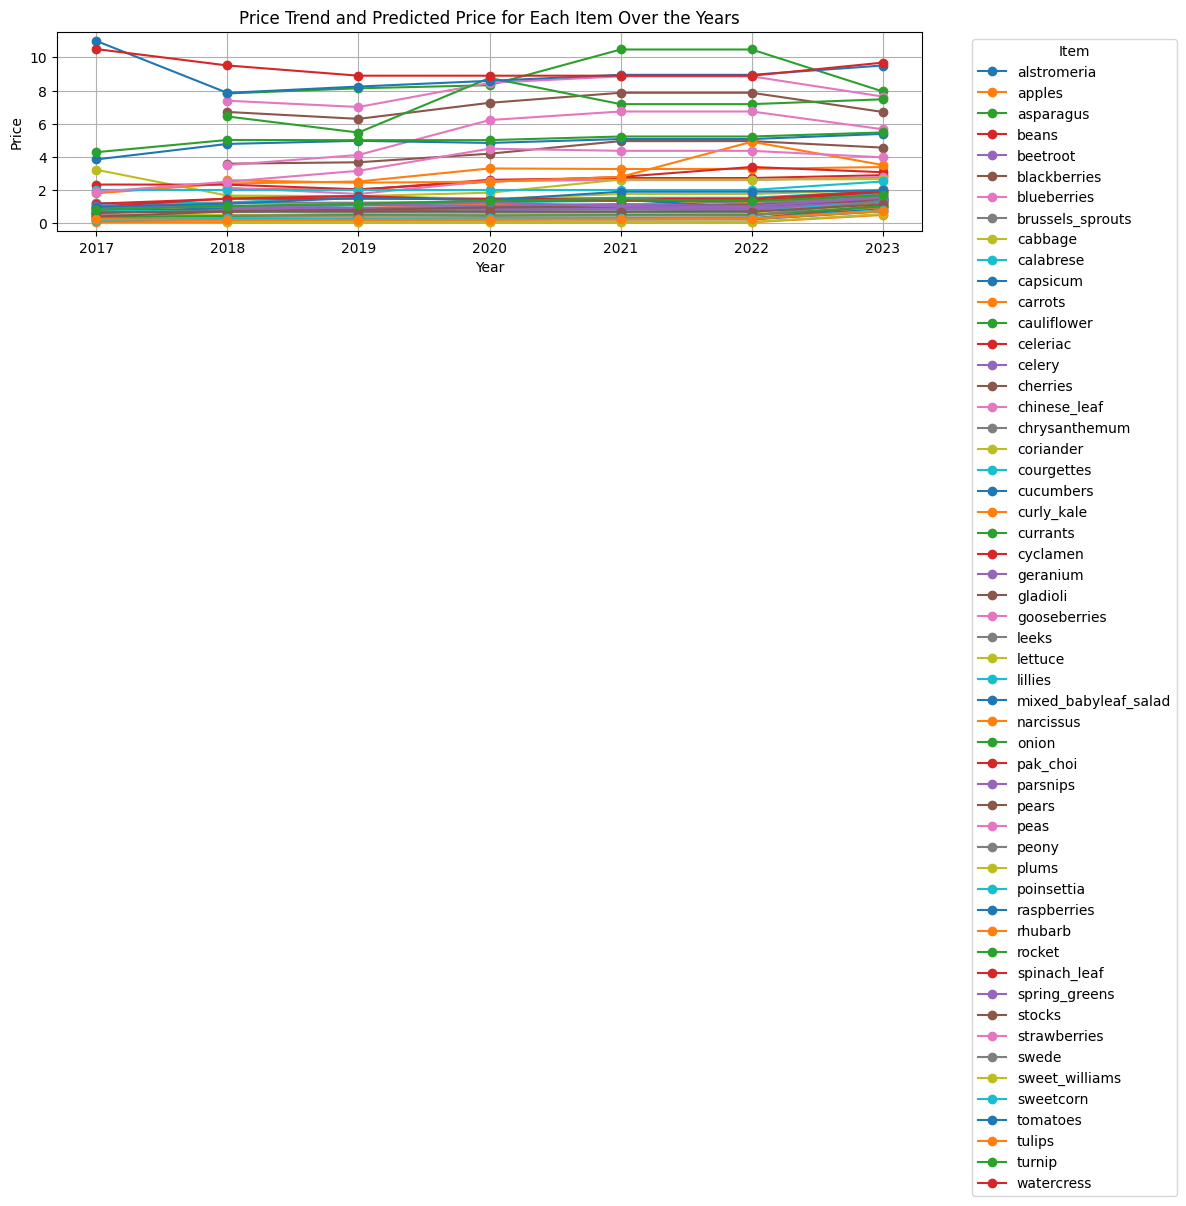

In [25]:
import matplotlib.pyplot as plt

# Transpose the DataFrame to have years as the index and items as columns for plotting
plot_data = final_combined_data.T

# Convert the index to numeric, coercing errors to NaN
plot_data.index = pd.to_numeric(plot_data.index, errors='coerce')

# Add a new row for the predicted prices with the year 2023
predicted_row = final_combined_data['Predicted Price in 2023']
predicted_row.name = 2023
plot_data = pd.concat([plot_data, predicted_row.to_frame().T])

# Sort the index to ensure years are in order
plot_data = plot_data.sort_index()

# Remove NaN values from the index before setting x-ticks
valid_xticks = plot_data.index.dropna()

# Plot the data
plt.figure(figsize=(12, 8))
for column in plot_data.columns:
    plt.plot(plot_data.index, plot_data[column], marker='o', linestyle='-', label=column)

plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price Trend and Predicted Price for Each Item Over the Years')
plt.xticks(valid_xticks) # Ensure all years are shown on the x-axis
plt.legend(title='Item', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

# Plot historical data and regression models for selected items

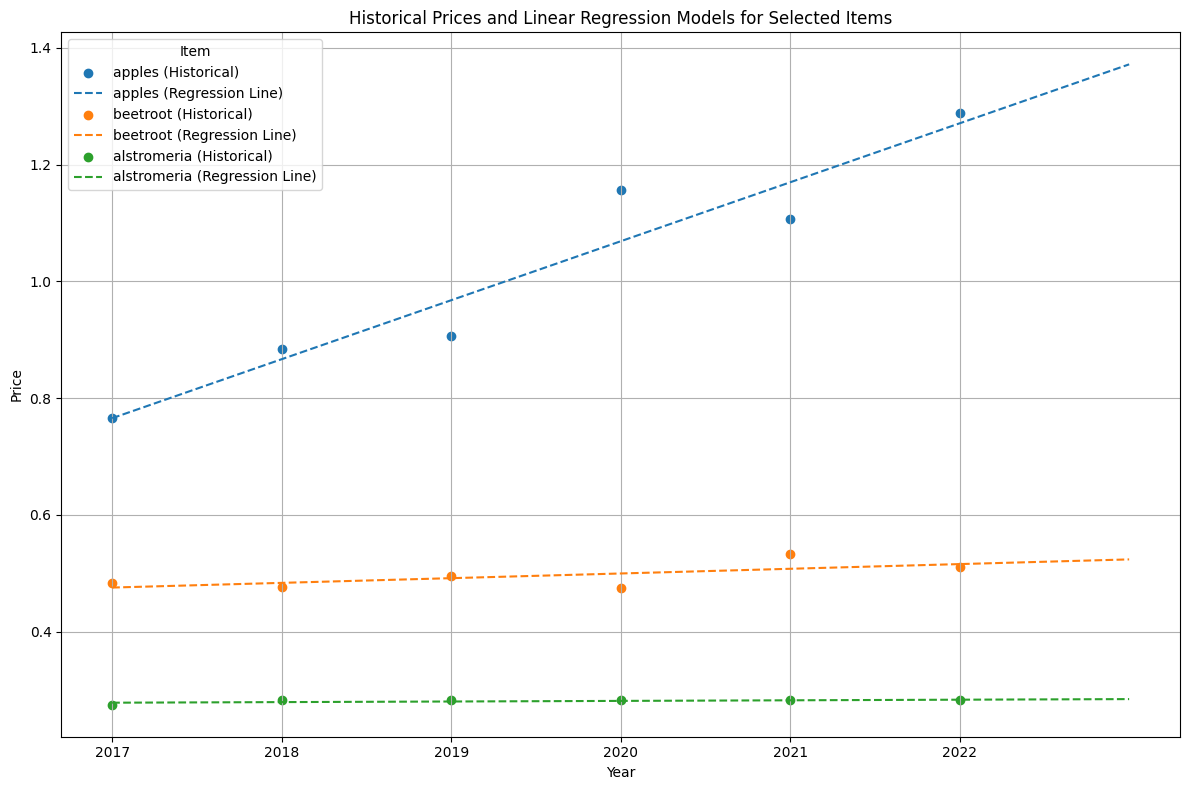

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

# Define the specific items to plot
selected_items = ['apples', 'beetroot', 'alstromeria']

# Filter the combined data to include only the selected items
filtered_data = combined_price_data[combined_price_data['item'].isin(selected_items)].copy()

# Convert 'year' to numeric type for plotting and model fitting
filtered_data['year'] = pd.to_numeric(filtered_data['year'])

# Plot the historical data and regression line for each of the selected items
plt.figure(figsize=(12, 8))

for item in selected_items:
    item_data = filtered_data[filtered_data['item'] == item]

    # Plot historical data points
    plt.scatter(item_data['year'], item_data['price'], label=f'{item} (Historical)')

    # Fit a linear regression model to the historical data for the current item
    # Reshape the year data for the model
    years = item_data['year'].values.reshape(-1, 1)
    prices = item_data['price'].values

    # Create and fit the model, handling potential errors with insufficient data
    try:
        model = LinearRegression()
        model.fit(years, prices)

        # Predict prices for a range of years to draw the regression line
        # Ensure the range includes the historical years and extends slightly beyond
        years_for_line = np.array(range(item_data['year'].min(), item_data['year'].max() + 2)).reshape(-1, 1)
        predicted_prices_for_line = model.predict(years_for_line)

        # Plot the regression line
        plt.plot(years_for_line.flatten(), predicted_prices_for_line, linestyle='--', label=f'{item} (Regression Line)')
    except ValueError as e:
        print(f"Could not fit regression model for {item}: {e}")
        plt.plot([], [], linestyle='--', label=f'{item} (Regression Line) - Not Fitted')


plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Historical Prices and Linear Regression Models for Selected Items')
plt.xticks(filtered_data['year'].unique()) # Ensure all historical years are shown on the x-axis
plt.legend(title='Item')
plt.grid(True)
plt.tight_layout()
plt.show()